In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import wrangle_telco
from utilities import split_dataframe
from prepare import generate_scaled_splits

# Scaling exercises

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results.

In [2]:
telco_df = wrangle_telco()

In [3]:
telco_df.head()

,customer_id,monthly_charges,tenure,total_charges
1793,0016-QLJIS,90.45,65,5957.90
1794,0017-DINOC,45.20,54,2460.55
1795,0019-GFNTW,45.05,56,2560.10
1796,0056-EPFBG,39.40,20,825.40
1797,0078-XZMHT,85.15,72,6316.20


(array([ 13.,   8.,  25.,  13.,  27.,  16.,  18.,  22.,  25.,  16.,  24.,
         21.,  37.,  33.,  39.,  52.,  43.,  48.,  75.,  71.,  83., 106.,
        125., 187., 568.]),
 array([ 0.  ,  2.88,  5.76,  8.64, 11.52, 14.4 , 17.28, 20.16, 23.04,
        25.92, 28.8 , 31.68, 34.56, 37.44, 40.32, 43.2 , 46.08, 48.96,
        51.84, 54.72, 57.6 , 60.48, 63.36, 66.24, 69.12, 72.  ]),
 <BarContainer object of 25 artists>)

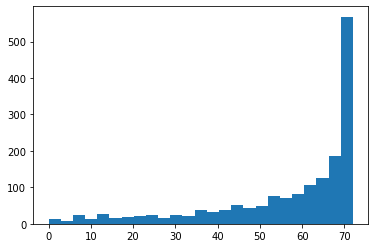

In [4]:
plt.hist(telco_df.tenure, bins=25)

(array([ 81.,  94., 132., 181., 141.,  77.,  23.,  25.,  30.,  43.,  51.,
         58.,  57.,  69.,  54.,  58.,  71.,  73.,  78.,  61.,  48.,  50.,
         62.,  50.,  28.]),
 array([   0.   ,  346.898,  693.796, 1040.694, 1387.592, 1734.49 ,
        2081.388, 2428.286, 2775.184, 3122.082, 3468.98 , 3815.878,
        4162.776, 4509.674, 4856.572, 5203.47 , 5550.368, 5897.266,
        6244.164, 6591.062, 6937.96 , 7284.858, 7631.756, 7978.654,
        8325.552, 8672.45 ]),
 <BarContainer object of 25 artists>)

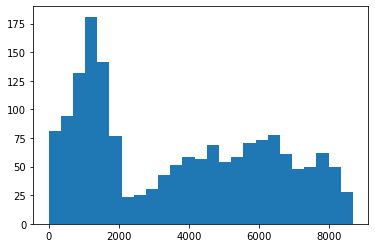

In [5]:
plt.hist(telco_df.total_charges, bins=25)

(array([406., 229.,   4.,   2.,  10.,  26.,  16.,  20.,  30.,  26.,  60.,
         60.,  44.,  46.,  44.,  96.,  84.,  75.,  49.,  35.,  54.,  72.,
         88.,  66.,  53.]),
 array([ 18.4  ,  22.414,  26.428,  30.442,  34.456,  38.47 ,  42.484,
         46.498,  50.512,  54.526,  58.54 ,  62.554,  66.568,  70.582,
         74.596,  78.61 ,  82.624,  86.638,  90.652,  94.666,  98.68 ,
        102.694, 106.708, 110.722, 114.736, 118.75 ]),
 <BarContainer object of 25 artists>)

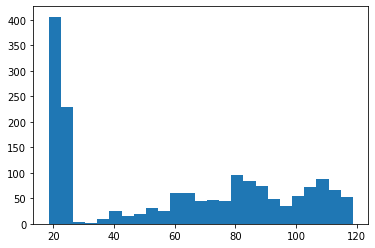

In [6]:
plt.hist(telco_df.monthly_charges, bins=25)

In [7]:
telco_df = telco_df.set_index('customer_id')
train, validate, test = split_dataframe(telco_df)

In [10]:
x_train = train
x_validate = validate
x_test = test

#### Min-max scaling

In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [10]:
scaler.fit(x_train)

MinMaxScaler()

In [12]:
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=['customer_id', 'monthly_charges', 'tenure'])
x_validate_scaled = pd.DataFrame(scaler.transform(x_validate), columns=['customer_id', 'monthly_charges', 'tenure'])
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=['customer_id', 'monthly_charges', 'tenure'])

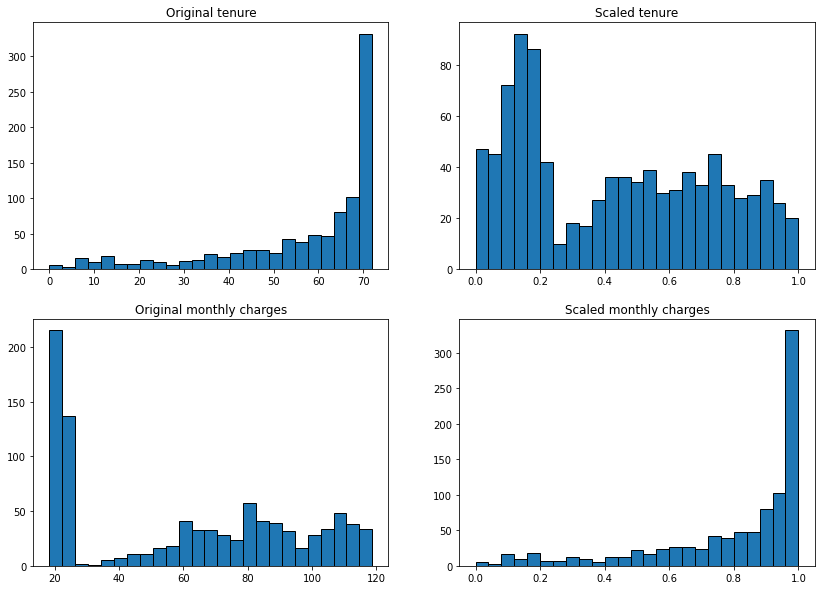

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(14, 10))
plt.subplot(221)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(222)
plt.hist(x_train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(223)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')
plt.subplot(224)
plt.hist(x_train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled monthly charges')
plt.show()
plt.tight_layout()

#### Standard scaler

In [14]:
standard_scaler = sklearn.preprocessing.StandardScaler()

In [15]:
standard_scaler.fit(x_train)

StandardScaler()

In [16]:
x_train_standardized = pd.DataFrame(standard_scaler.transform(x_train), columns=['customer_id', 'monthly_charges', 'tenure'])
x_validate_standardized = pd.DataFrame(standard_scaler.transform(x_validate), columns=['customer_id', 'monthly_charges', 'tenure'])
x_test_standardized = pd.DataFrame(standard_scaler.transform(x_test), columns=['customer_id', 'monthly_charges', 'tenure'])

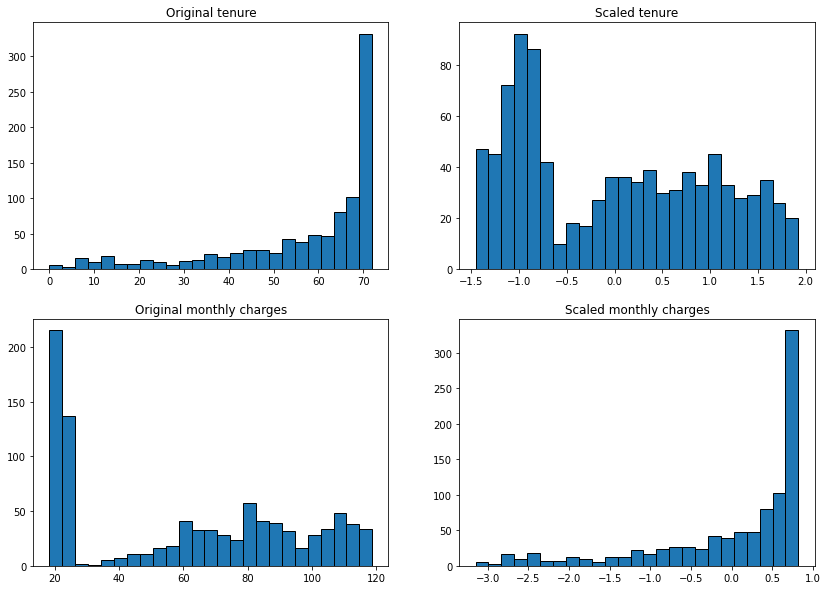

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(14, 10))
plt.subplot(221)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(222)
plt.hist(x_train_standardized.tenure, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(223)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')
plt.subplot(224)
plt.hist(x_train_standardized.monthly_charges, bins=25, ec='black')
plt.title('Scaled monthly charges')
plt.show()
plt.tight_layout()

#### Robust scaler

In [18]:
robust = sklearn.preprocessing.RobustScaler()

In [19]:
robust.fit(x_train)

RobustScaler()

In [20]:
x_train_robust = pd.DataFrame(robust.transform(x_train), columns=['customer_id', 'monthly_charges', 'tenure'])
x_validate_robust = pd.DataFrame(robust.transform(x_validate), columns=['customer_id', 'monthly_charges', 'tenure'])
x_test_robust = pd.DataFrame(robust.transform(x_test), columns=['customer_id', 'monthly_charges', 'tenure'])

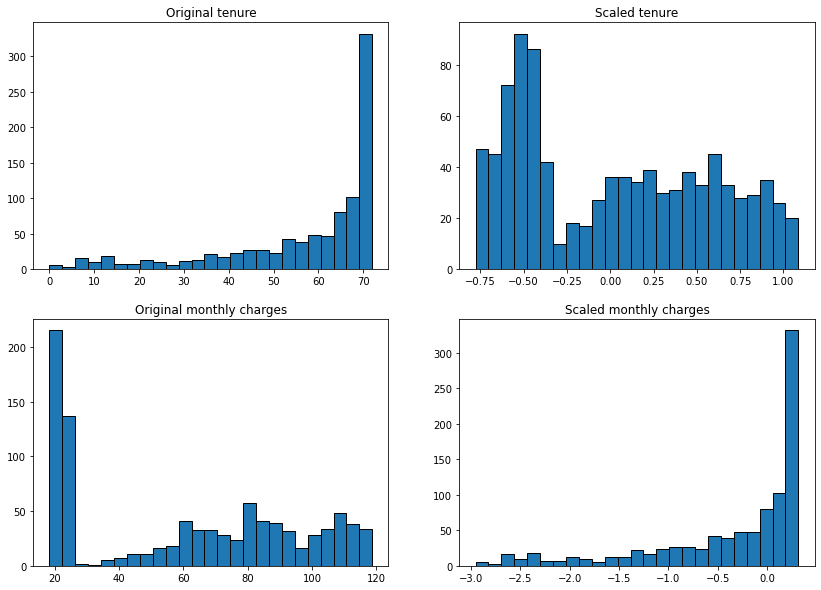

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(14, 10))
plt.subplot(221)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')
plt.subplot(222)
plt.hist(x_train_robust.tenure, bins=25, ec='black')
plt.title('Scaled tenure')
plt.subplot(223)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')
plt.subplot(224)
plt.hist(x_train_robust.monthly_charges, bins=25, ec='black')
plt.title('Scaled monthly charges')
plt.show()
plt.tight_layout()

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [23]:
x_train_min_max_inverse = pd.DataFrame(scaler.inverse_transform(x_train_scaled), columns=['customer_id', 'monthly_charges', 'tenure'])
x_train_standardized_inverse = pd.DataFrame(standard_scaler.inverse_transform(x_train_standardized), columns=['customer_id', 'monthly_charges', 'tenure'])
x_train_robust_inverse = pd.DataFrame(robust.inverse_transform(x_train_robust), columns=['customer_id', 'monthly_charges', 'tenure'])

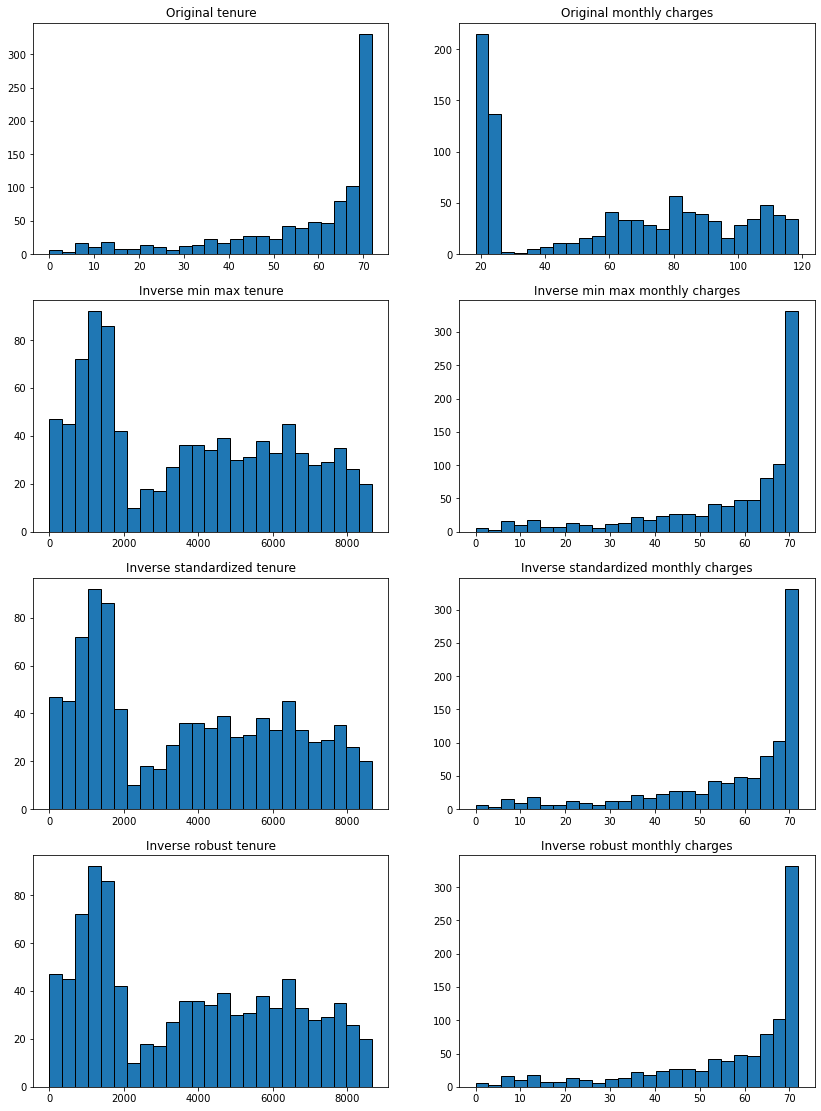

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(14, 40))

plt.subplot(821)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')

plt.subplot(822)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')

plt.subplot(823)
plt.hist(x_train_min_max_inverse.tenure, bins=25, ec='black')
plt.title('Inverse min max tenure')

plt.subplot(824)
plt.hist(x_train_min_max_inverse.monthly_charges, bins=25, ec='black')
plt.title('Inverse min max monthly charges')

plt.subplot(825)
plt.hist(x_train_standardized_inverse.tenure, bins=25, ec='black')
plt.title('Inverse standardized tenure')

plt.subplot(826)
plt.hist(x_train_standardized_inverse.monthly_charges, bins=25, ec='black')
plt.title('Inverse standardized monthly charges')

plt.subplot(827)
plt.hist(x_train_robust_inverse.tenure, bins=25, ec='black')
plt.title('Inverse robust tenure')

plt.subplot(828)
plt.hist(x_train_robust_inverse.monthly_charges, bins=25, ec='black')
plt.title('Inverse robust monthly charges')

plt.show()
plt.tight_layout()

## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

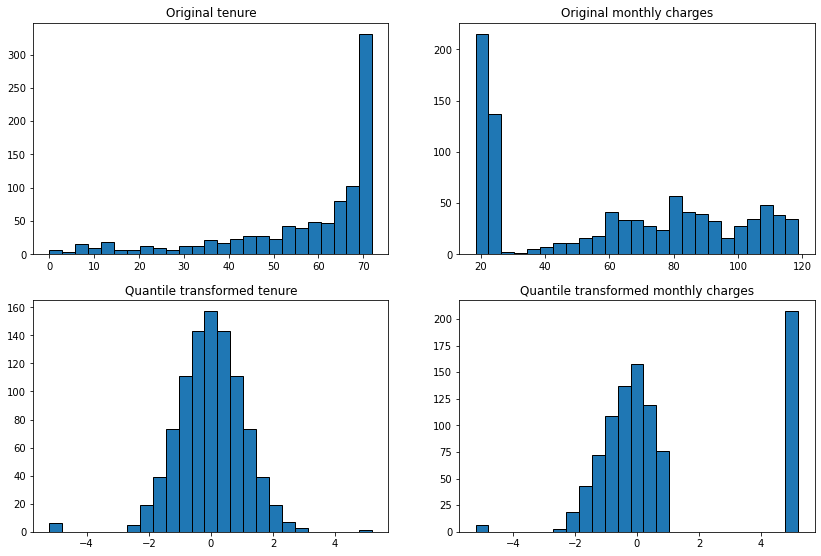

<Figure size 432x288 with 0 Axes>

In [25]:
quantiles = sklearn.preprocessing.QuantileTransformer(output_distribution="normal")

quantiles.fit(x_train)

x_train_quant = pd.DataFrame(quantiles.transform(x_train), columns=['customer_id', 'monthly_charges', 'tenure'])

plt.figure(figsize=(14, 40))

plt.subplot(821)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')

plt.subplot(822)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')

plt.subplot(823)
plt.hist(x_train_quant.tenure, bins=25, ec='black')
plt.title('Quantile transformed tenure')

plt.subplot(824)
plt.hist(x_train_quant.monthly_charges, bins=25, ec='black')
plt.title('Quantile transformed monthly charges')

plt.show()
plt.tight_layout()

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

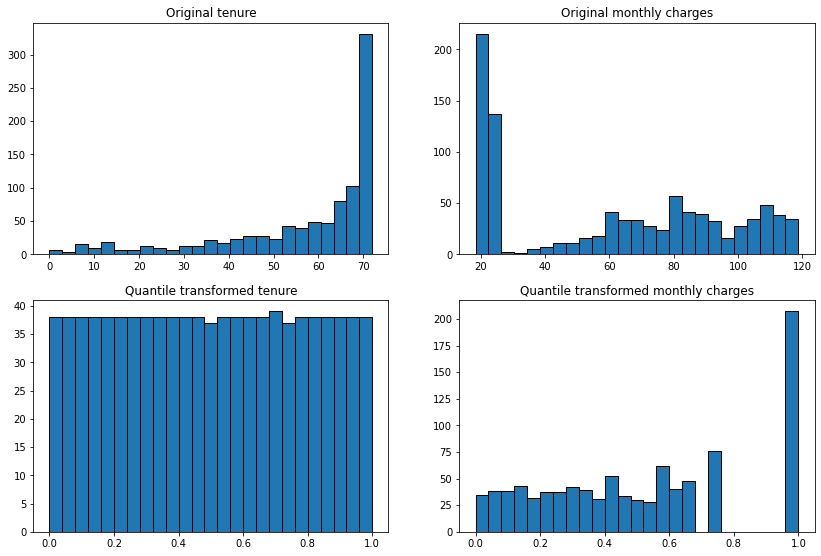

<Figure size 432x288 with 0 Axes>

In [26]:
quantiles_uni = sklearn.preprocessing.QuantileTransformer()

quantiles_uni.fit(x_train)

x_train_quant_uni = pd.DataFrame(quantiles_uni.transform(x_train), columns=['customer_id', 'monthly_charges', 'tenure'])

plt.figure(figsize=(14, 40))

plt.subplot(821)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')

plt.subplot(822)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')

plt.subplot(823)
plt.hist(x_train_quant_uni.tenure, bins=25, ec='black')
plt.title('Quantile transformed tenure')

plt.subplot(824)
plt.hist(x_train_quant_uni.monthly_charges, bins=25, ec='black')
plt.title('Quantile transformed monthly charges')

plt.show()
plt.tight_layout()

After the scaling, the data is distributed uniformally rather than normally.

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [8]:
train_min_max, validate_min_max, test_min_max = generate_scaled_splits(train, validate, test)

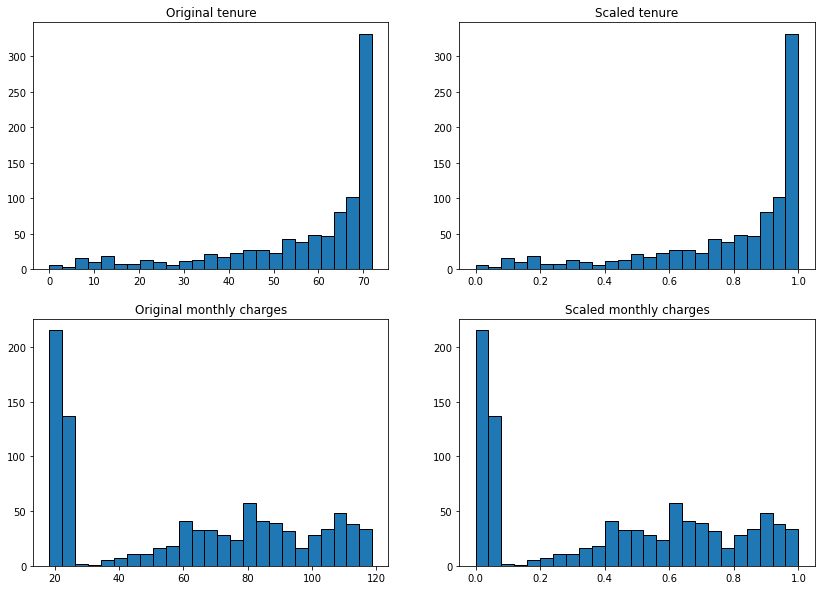

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(14, 10))

plt.subplot(221)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')

plt.subplot(222)
plt.hist(train_min_max.tenure, bins=25, ec='black')
plt.title('Scaled tenure')

plt.subplot(223)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')

plt.subplot(224)
plt.hist(train_min_max.monthly_charges, bins=25, ec='black')
plt.title('Scaled monthly charges')

plt.show()
plt.tight_layout()

In [13]:
train_robust, validate_robust, test_robust = generate_scaled_splits(train, validate, test, sklearn.preprocessing.RobustScaler())

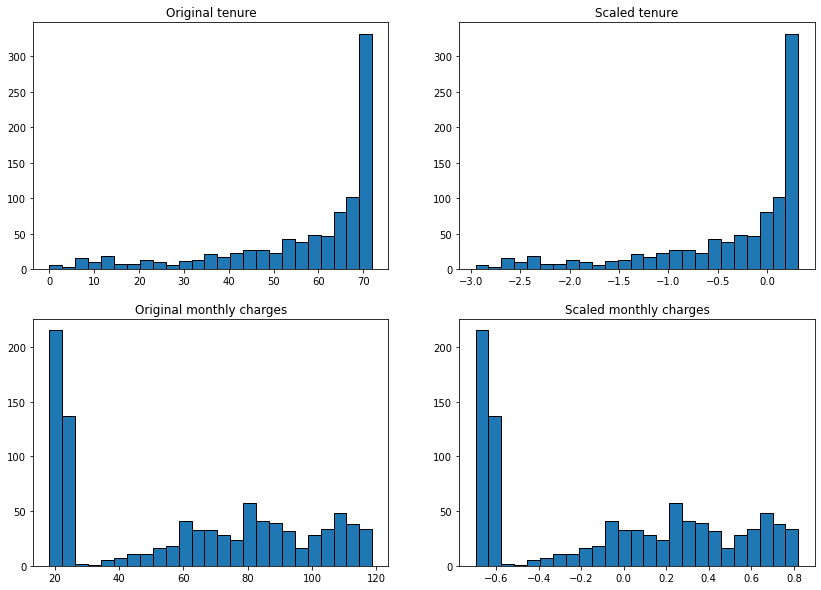

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(14, 10))

plt.subplot(221)
plt.hist(x_train.tenure, bins=25, ec='black')
plt.title('Original tenure')

plt.subplot(222)
plt.hist(train_robust.tenure, bins=25, ec='black')
plt.title('Scaled tenure')

plt.subplot(223)
plt.hist(x_train.monthly_charges, bins=25, ec='black')
plt.title('Original monthly charges')

plt.subplot(224)
plt.hist(train_robust.monthly_charges, bins=25, ec='black')
plt.title('Scaled monthly charges')

plt.show()
plt.tight_layout()